# Export and import from Cut flowers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

Create the function to transform the code that generate less than 1% of total dollars in "Othe Flower bulbs" and one class to associate codes with colors

In [2]:
def define_code(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other Cut flowers"

class ColorGenerator:
    def __init__(self):
        self.colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
                       '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
                       '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
                       '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
                       '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']
        self.colors = ['yellow', 'blue', 'green', 'purple','red', 'orange', 'black', "brown"]
        self.index_color = 0
        self.dict_color = {}
        
    def color(self, code):
        if code in self.dict_color:
            return self.dict_color[code]
        self.dict_color[code] = self.colors[self.index_color]
        self.index_color += 1
        return self.dict_color[code]
    
    def reset(self):
        self.index_color = 0
        self.dict_color = {}
        
generator = ColorGenerator()


Define path of file and columns that we need to analize

In [3]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

Read data, filter that to only have the Flower bulbs group, change the columns name and concatenate the files in one big file.

In [4]:
data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"

data_export = data_export[data_export["GROUP"] == "Cut flowers"]
data_import = data_import[data_import["GROUP"] == "Cut flowers"]

data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])


Print the table

In [5]:
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO', "TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)

USD                                         \
YEAR                             2011         2012         2013         2014   
CODIGO            TYPE                                                         
Chrysanthemum sp. Import   8445522.79   9986704.23  12300496.04  13824670.14   
Dyanthus sp.      Import    656566.04   2921348.08   3332379.92   2271708.69   
Gladiolus sp.     Import         0.00     63206.44    105576.73    284328.00   
Gypsophila sp.    Import         0.00   8599800.53   7818364.43   7572710.47   
Hypericum sp.     Export         0.00         0.00         0.00      8360.00   
                  Import         0.00   3215003.95   2796324.05   2441368.62   
Liatris sp.       Import         0.00         0.00     20787.49    120710.97   
Lilium sp.        Export         0.00     23829.80         0.00         0.00   
                  Import         0.00         0.00      5544.26    639583.94   
Limonium sp.      Import         0.00      7397.70     23369.58     23597.73   
Orchids           Export         0.00         0.00      3907.80         0.00   
                  Import     27522.78     13826.50     23445.55      5930.69   
Others            Export   5603122.27   4992427.78   5328627.58  13544565.34   
                  Import  12260928.76   8142381.26  11571680.25  14354724.04   
Paeonia sp.       Export   1359080.17    955334.89   1214127.60   2892043.17   
                  Import      4567.96      4260.30         0.00    314669.47   
Rosa sp.          Import  12421797.87  19104460.37  21260886.69  22657053.27   
Tulipa sp.        Export     20253.12    108779.22    353240.42    384822.45   
                  Import     73966.75         0.00       155.48     43283.99   
Zantedeschia sp.  Export    373000.35    232569.15    271701.85    306242.25   
                  Import      9092.05       581.71      5649.70    102064.16   

                                                                 
YEAR                             2015         2016         2017  
CODIGO            TYPE                                           
Chrysanthemum sp. Import  16430137.58  17119485.39   7226840.27  
Dyanthus sp.      Import    893846.56    551514.64    389759.15  
Gladiolus sp.     Import    321362.64    175662.84     78706.22  
Gypsophila sp.    Import   6159573.42   6369776.01   2265236.84  
Hypericum sp.     Export         0.00         0.00         0.00  
                  Import   1804676.08   2123619.09    479046.36  
Liatris sp.       Import     53259.39     30988.60     42709.64  
Lilium sp.        Export         0.00      1460.00         0.00  
                  Import      8934.10      5536.76      7219.89  
Limonium sp.      Import         0.00     10661.63     50537.39  
Orchids           Export         0.00         0.00         0.00  
                  Import         0.00     13446.36     26400.98  
Others            Export  15265840.97  14473308.15   2063381.43  
                  Import  13763129.03  10507040.82   3577048.97  
Paeonia sp.       Export   2576390.11   2398839.61    187957.12  
                  Import    665111.00    668700.82     79089.11  
Rosa sp.          Import  22876975.79  23687303.88  11968272.47  
Tulipa sp.        Export    597920.21    540074.30      3992.00  
                  Import      9317.80     39271.72     48598.18  
Zantedeschia sp.  Export    591219.90    503562.40    176890.10  
                  Import      1609.80     10274.76      7575.60

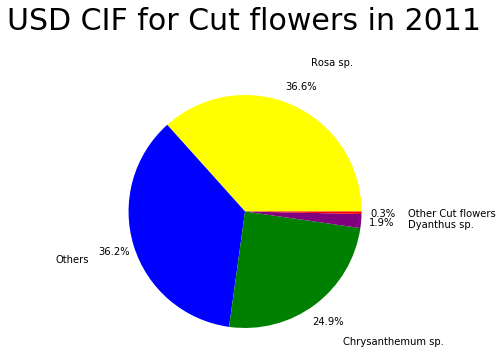

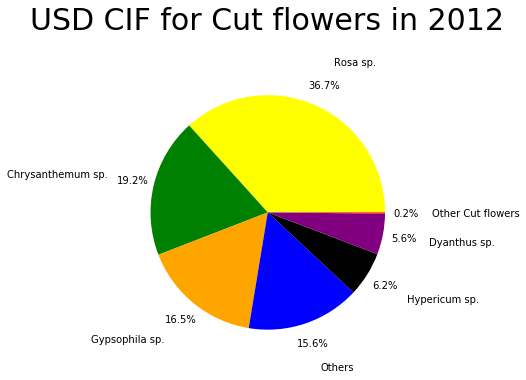

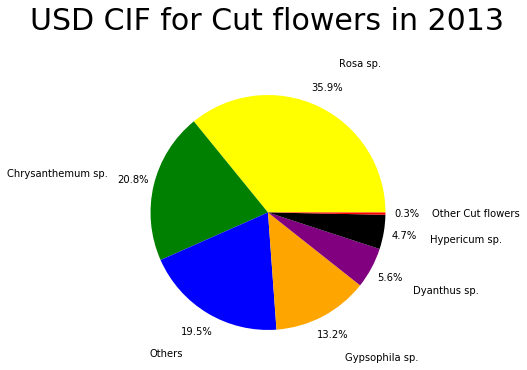

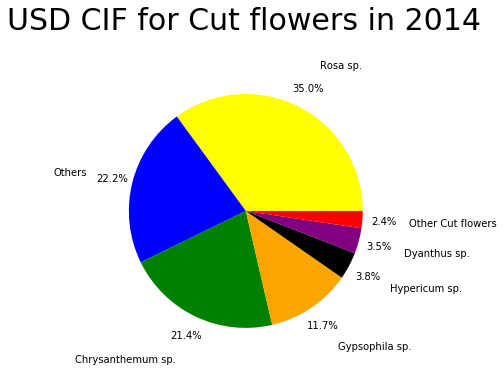

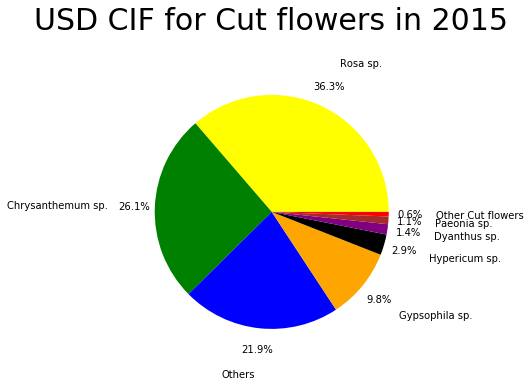

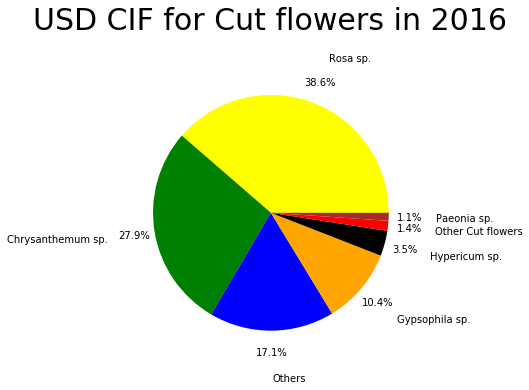

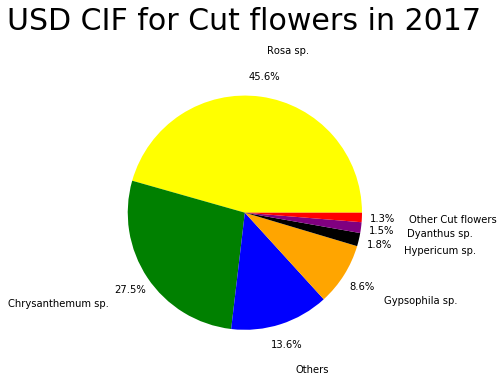

In [6]:
for year in range(2011, 2018):
    temporal_data = data_import[data_import["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD CIF for Cut flowers in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD CIF for Cut flowers in {}".format(year), bbox_inches='tight')
        plt.show()
generator.reset()

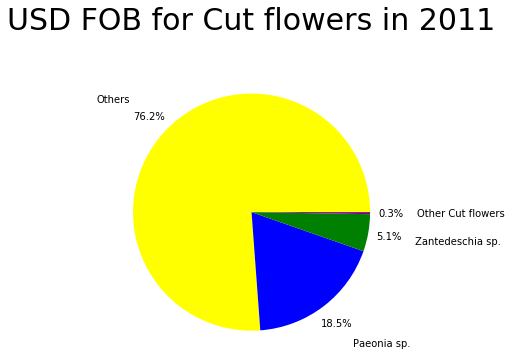

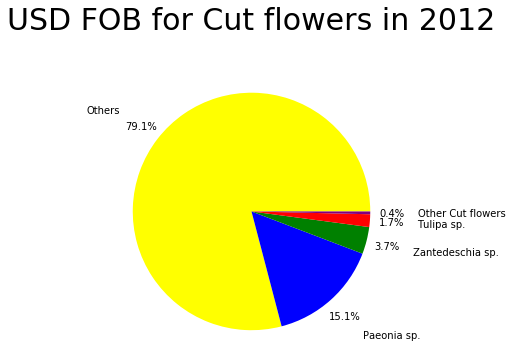

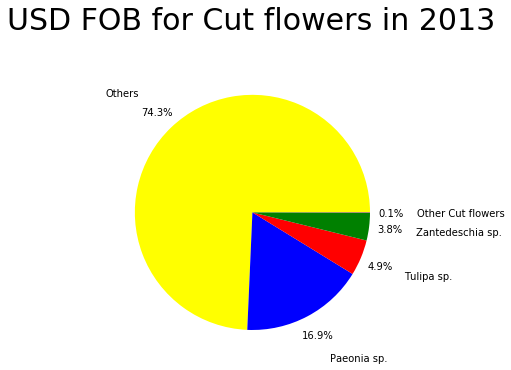

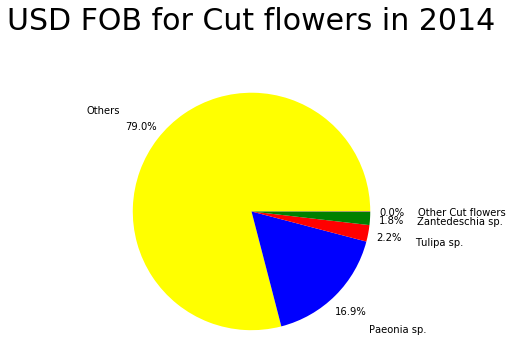

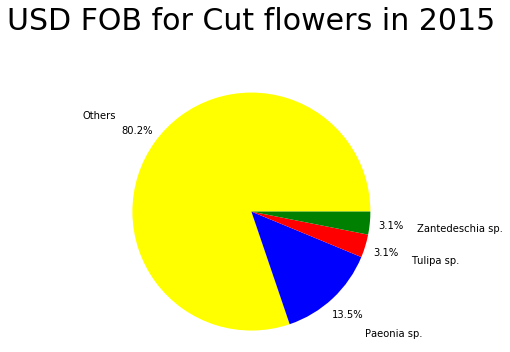

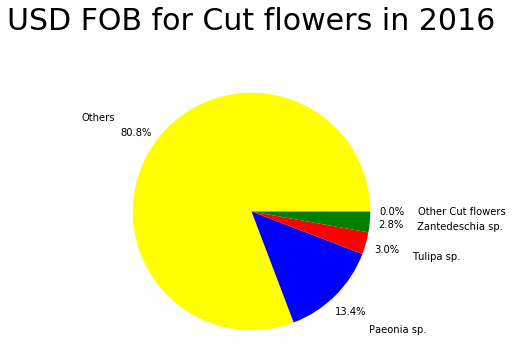

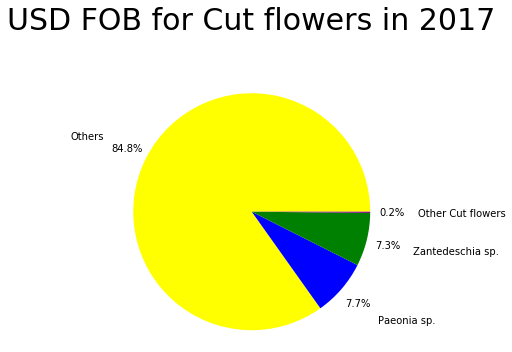

In [7]:
for year in range(2011, 2018):
    temporal_data = data_export[data_export["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD FOB for Cut flowers in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD FOB for Cut flowers in {}".format(year), bbox_inches='tight')
        plt.show()